In [1]:
from keras.datasets import mnist #impory mnist資料

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()#讀入mnist的train跟test

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt #畫圖用

In [4]:
#看看資料長怎樣
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

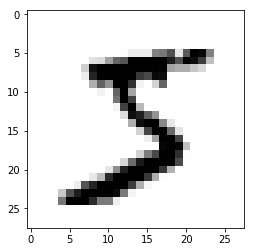

In [5]:
#畫個圖看看
plt.imshow(x_train[0], cmap='gray_r')

In [6]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #把y的分類改成多維的向量

In [7]:
#先把y的分類改成10維的向量
y_train_label = to_categorical(y_train)
y_test_label = to_categorical(y_test)

In [8]:
y_train[0:3]

array([5, 0, 4], dtype=uint8)

In [9]:
y_train_label[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [10]:
#幾種不同模型的寫法
def get_model(mode):
    if mode == 1:
        #寫法1
        model = Sequential()
        model.add(Flatten(input_shape=(28,28))) #把dim=(28,28)的資料，拉成784個輸入
        model.add(Dense(output_dim=500)) # 在新版keras中，output_dim已改為units
        model.add(Activation('sigmoid')) #也可改用relu之類的
        model.add(Dense(output_dim=500))
        model.add(Activation('sigmoid'))
        model.add(Dense(output_dim=10))
        model.add(Activation('softmax'))
    elif mode == 2:
        #寫法2
        model = Sequential()
        model.add(Flatten(input_shape=(28,28))) #把dim=(28,28)的資料，拉成784個input
        model.add(Dense(500))
        model.add(Activation('sigmoid'))
        model.add(Dense(500))
        model.add(Activation('sigmoid'))
        model.add(Dense(10))
        model.add(Activation('softmax'))
    else:
        #寫法3
        model = Sequential()
        model.add(Flatten(input_shape=(28,28))) #把dim=(28,28)的資料，拉成784個input
        model.add(Dense(500, activation='sigmoid'))
        model.add(Dense(500, activation='sigmoid'))
        model.add(Dense(10, activation='softmax'))
    return model

In [11]:
model = get_model(mode=1)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=500)`
  import sys
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500)`
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  # This is added back by InteractiveShellApp.init_path()


In [12]:
#要如何衡量一個model的好壞，以及如何找最好的model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#僅分成兩類時，loss='binary_crossentropy'

In [13]:
model.fit(x_train, y_train_label, batch_size=1000, nb_epoch=10)
#可直接把training set拆出一部分為validation set，如下：
#model.fit(x_train, y_train_label, batch_size=100, epochs=20, validation_spilt=0.25)
#validation_spilt=0.25：抽取25%的training data作驗證，這25%不在training中使用

C:\Anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.7125 - acc: 0.8167
Epoch 2/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2635 - acc: 0.9260
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.2085 - acc: 0.9407
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.1804 - acc: 0.9477
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1595 - acc: 0.9539
Epoch 6/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1511 - acc: 0.9568
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1375 - acc: 0.9597
Epoch 8/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1315 - acc: 0.9611
Epoch 9/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1186 - acc: 0.9647
Epoch 10/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1228 -

In [14]:
#看此model在test data上的準確率
score = model.evaluate(x_test,y_test_label)
print('Total loss on Testing Set', score[0])
print('Accuracy of Testing Set', score[1])

10000/10000 [==============================] - 1s 143us/step
Total loss on Testing Set 0.14099437284171581
Accuracy of Testing Set 0.9554


In [15]:
#看此model在x_test上預測的值
result = model.predict(x_test)

In [16]:
result[0:2] 

array([[3.2702130e-06, 2.1214960e-06, 3.0187543e-05, 4.7730710e-04,
        7.5440276e-08, 1.3616125e-06, 2.7477494e-09, 9.9947447e-01,
        1.4791267e-07, 1.1086096e-05],
       [5.6382396e-05, 2.6815017e-03, 9.9060142e-01, 5.9032436e-03,
        2.0856633e-07, 2.6807829e-04, 3.2706888e-04, 3.9170632e-06,
        1.5800986e-04, 1.5593376e-07]], dtype=float32)

In [17]:
result2 = [np.argmax(x) for x in result] #算一下模型給出的答案
np.array(result2[0:20])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

In [18]:
y_test[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)